# MDPOW Workflows Tutorial: Automated Dihedral Analysis
##### - Cade Duckworth, January 2023, incomplete documentation

# Demonstration of stand-alone and top-level function use

## Imports

In [1]:
import os
import sys

import pathlib
import pandas as pd
import nglview as nv
import MDAnalysis as mda

sys.path.append('/nfs/homes3/cade/Projects/Repositories/MDPOW-ADA/')
import mdpow
sys.path.append('/nfs/homes3/cade/Projects/Repositories/MDPOW-ADA/mdpow/workflows/')
import dihedrals

mdpow       : INFO     MDPOW 0.8.0+130.g9fe35ec.dirty starting.
mdpow       : INFO     Copyright (c) 2010-2021 Shujie Fan, Ian Kenney, Alia Lescoulie, Bogdan Iorga, and Oliver Beckstein
mdpow       : INFO     Released under the GNU Public Licence, version 3.
mdpow       : INFO     For bug reports and help: https://github.com/Becksteinlab/MDPOW/issues


## Basic Parameters

In [2]:
dirname = '/nfs/homes3/cade/Projects/Repositories/MDPOW-ADA/mdpow/tests/testing_resources/states/workflows/SM25'

### Using the following directory to save plots (.pdf) and results-DataFrame (compressed .bz2 file)
##### serving as df_save_dir & figdir kwargs

In [3]:
df_save_directory = '/nfs/homes3/cade/Projects/Notebooks/tmp_data/'

In [4]:
path = pathlib.Path(df_save_directory)

In [5]:
fig_save_directory = path / 'SM25_figures'

In [6]:
os.mkdir(fig_save_directory)

## Naming conventions specified in top / traj

In [7]:
resname = 'UNK' # recognized name

In [8]:
molname = 'SM25' # desired name for data storage, if not recognized defaults to^

## DihedralAnalysis Level Kwargs

In [9]:
solvents = ('water',)

In [10]:
interactions = ('Coulomb', 'VDW')

## Periodic Angle Padding and Violin KDE Width

In [11]:
padding = 45

In [12]:
width = 0.9

## Defined/specified at the module level, shown here for clarity

In [13]:
SMARTS_DEFAULT = '[!#1]~[!$(*#*)&!D1]-!@[!$(*#*)&!D1]~[!#1]'

# Individual, stand-alone function usage

## Build MDAnalysis Universe

In [14]:
u = dihedrals.build_universe(dirname)

In [15]:
u

<Universe with 2774 atoms>

## Convert MDA Universe Object to RDKit Mol Object

In [16]:
mol = dihedrals.rdkit_conversion(u, resname)[0]

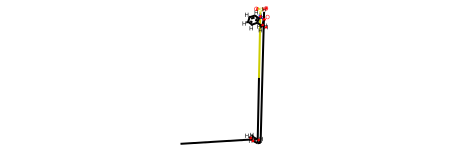

In [17]:
mol

In [18]:
solute = dihedrals.rdkit_conversion(u, resname)[1]

In [19]:
solute

<AtomGroup with 35 atoms>

## View Molecule (SM25)

In [20]:
view = nv.show_mdanalysis(solute)

In [21]:
view

NGLWidget(max_frame=100)

In [22]:
view2 = nv.show_rdkit(mol)

In [23]:
view2

NGLWidget()

## Retrieving atom indices for desired dihedral atom groups
##### encompasses functions displayed above

In [24]:
atom_group_indices = dihedrals.dihedral_indices(dirname, resname, SMARTS=SMARTS_DEFAULT)

In [25]:
atom_group_indices

((0, 1, 2, 3),
 (0, 1, 12, 13),
 (1, 2, 3, 11),
 (1, 2, 3, 10),
 (1, 2, 3, 4),
 (1, 12, 13, 14),
 (2, 3, 4, 5),
 (2, 3, 4, 9),
 (2, 1, 12, 13),
 (3, 2, 1, 12),
 (5, 4, 3, 11),
 (5, 4, 3, 10),
 (9, 4, 3, 11),
 (9, 4, 3, 10),
 (12, 13, 14, 15),
 (12, 13, 14, 19))

## Translation of atom group indices to atom names per group
##### not required for full functionality, convenient for checking results

In [26]:
dihedral_groups = dihedrals.dihedral_groups(dirname, resname, SMARTS=SMARTS_DEFAULT)

In [27]:
dihedral_groups

[array(['O1', 'C2', 'N3', 'S4'], dtype=object),
 array(['O1', 'C2', 'C13', 'C14'], dtype=object),
 array(['C2', 'N3', 'S4', 'O12'], dtype=object),
 array(['C2', 'N3', 'S4', 'O11'], dtype=object),
 array(['C2', 'N3', 'S4', 'C5'], dtype=object),
 array(['C2', 'C13', 'C14', 'C15'], dtype=object),
 array(['N3', 'S4', 'C5', 'C6'], dtype=object),
 array(['N3', 'S4', 'C5', 'C10'], dtype=object),
 array(['N3', 'C2', 'C13', 'C14'], dtype=object),
 array(['S4', 'N3', 'C2', 'C13'], dtype=object),
 array(['C6', 'C5', 'S4', 'O12'], dtype=object),
 array(['C6', 'C5', 'S4', 'O11'], dtype=object),
 array(['C10', 'C5', 'S4', 'O12'], dtype=object),
 array(['C10', 'C5', 'S4', 'O11'], dtype=object),
 array(['C13', 'C14', 'C15', 'C16'], dtype=object),
 array(['C13', 'C14', 'C15', 'C20'], dtype=object)]

## Obtaining DihedralAnalysis results for each identified dihedral atom group

In [28]:
df = dihedrals.dihedral_groups_ensemble(dirname, atom_group_indices,
                                        solvents=solvents, interactions=interactions)

mdpow._ensemble: INFO     Searching . directory for systems
mdpow._ensemble: INFO     Searching . directory for systems
mdpow._ensemble: INFO     Setting up systems


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'Coulomb', '0000')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'Coulomb', '0500')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'Coulomb', '1000')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'VDW', '0000')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'VDW', '0200')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'VDW', '0500')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'VDW', '1000')]

mdpow._ensemble: INFO     Moving to next universe
mdpow._ensemble: INFO     Finishing up


In [29]:
df

,selection,solvent,interaction,lambda,time,dihedral
0,O1-C2-N3-S4,water,Coulomb,0000,0.0,-6.095364
1,O1-C2-C13-C14,water,Coulomb,0000,0.0,55.665298
2,C2-N3-S4-O12,water,Coulomb,0000,0.0,43.956449
3,C2-N3-S4-O11,water,Coulomb,0000,0.0,176.453687
4,C2-N3-S4-C5,water,Coulomb,0000,0.0,-74.447725
...,...,...,...,...,...,...
11307,C6-C5-S4-O11,water,VDW,1000,50000.0,28.624856
11308,C10-C5-S4-O12,water,VDW,1000,50000.0,-14.635524
11309,C10-C5-S4-O11,water,VDW,1000,50000.0,-152.486151
11310,C13-C14-C15-C16,water,VDW,1000,50000.0,84.941038


## Optionally saving the results of the analysis before padding angles for visualization

In [30]:
dihedrals.save_df(df, df_save_dir=df_save_directory, resname=resname, molname=molname)

/nfs/homes3/cade/Projects/Notebooks/tmp_data/SM25/SM25_full_df.bz2


In [31]:
os.system(f'bunzip2 {df_save_directory}/SM25/SM25_full_df.csv.bz2')

0

## Periodic angle padding for violin plots

In [32]:
df_aug = dihedrals.periodic_angle(df, padding=padding)

/nfs/homes3/cade/Projects/Repositories/MDPOW-ADA/mdpow/workflows/dihedrals.py:340: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dihedral -= 360
/nfs/homes3/cade/Projects/Repositories/MDPOW-ADA/mdpow/workflows/dihedrals.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dihedral += 360


In [33]:
df_aug

,index,selection,solvent,interaction,lambda,time,dihedral
0,3,C2-N3-S4-O11,water,Coulomb,0000,0.0,-183.546313
1,9,S4-N3-C2-C13,water,Coulomb,0000,0.0,-190.786529
2,26,C6-C5-S4-O12,water,Coulomb,0000,500.0,-189.376818
3,41,S4-N3-C2-C13,water,Coulomb,0000,1000.0,-202.434820
4,44,C10-C5-S4-O12,water,Coulomb,0000,1000.0,-194.875231
...,...,...,...,...,...,...,...
14173,11273,S4-N3-C2-C13,water,VDW,1000,49000.0,200.308016
14174,11277,C10-C5-S4-O11,water,VDW,1000,49000.0,195.636933
14175,11289,S4-N3-C2-C13,water,VDW,1000,49500.0,200.110494
14176,11305,S4-N3-C2-C13,water,VDW,1000,50000.0,182.638040


## Angle padding confirmation section
* breakdown of code within function
* demonstrated piece-wise

### Upper threshold

In [34]:
DF1 = df[df.dihedral > 180 - padding]

In [35]:
DF1

,selection,solvent,interaction,lambda,time,dihedral
3,C2-N3-S4-O11,water,Coulomb,0000,0.0,176.453687
9,S4-N3-C2-C13,water,Coulomb,0000,0.0,169.213471
26,C6-C5-S4-O12,water,Coulomb,0000,500.0,170.623182
41,S4-N3-C2-C13,water,Coulomb,0000,1000.0,157.565180
44,C10-C5-S4-O12,water,Coulomb,0000,1000.0,165.124769
...,...,...,...,...,...,...
11274,C6-C5-S4-O12,water,VDW,1000,49000.0,152.919190
11283,C2-N3-S4-O11,water,VDW,1000,49500.0,153.810418
11290,C6-C5-S4-O12,water,VDW,1000,49500.0,136.063831
11293,C10-C5-S4-O11,water,VDW,1000,49500.0,172.211886


In [36]:
DF1.dihedral -= 360

/tmp/ipykernel_242960/3725066684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1.dihedral -= 360


In [37]:
DF1

,selection,solvent,interaction,lambda,time,dihedral
3,C2-N3-S4-O11,water,Coulomb,0000,0.0,-183.546313
9,S4-N3-C2-C13,water,Coulomb,0000,0.0,-190.786529
26,C6-C5-S4-O12,water,Coulomb,0000,500.0,-189.376818
41,S4-N3-C2-C13,water,Coulomb,0000,1000.0,-202.434820
44,C10-C5-S4-O12,water,Coulomb,0000,1000.0,-194.875231
...,...,...,...,...,...,...
11274,C6-C5-S4-O12,water,VDW,1000,49000.0,-207.080810
11283,C2-N3-S4-O11,water,VDW,1000,49500.0,-206.189582
11290,C6-C5-S4-O12,water,VDW,1000,49500.0,-223.936169
11293,C10-C5-S4-O11,water,VDW,1000,49500.0,-187.788114


### Lower threshold

In [38]:
DF2 = df[df.dihedral < -180 + padding]

In [39]:
DF2

,selection,solvent,interaction,lambda,time,dihedral
13,C10-C5-S4-O11,water,Coulomb,0000,0.0,-171.770840
19,C2-N3-S4-O11,water,Coulomb,0000,500.0,-167.398765
25,S4-N3-C2-C13,water,Coulomb,0000,500.0,-177.122381
29,C10-C5-S4-O11,water,Coulomb,0000,500.0,-153.669778
35,C2-N3-S4-O11,water,Coulomb,0000,1000.0,-148.433988
...,...,...,...,...,...,...
11273,S4-N3-C2-C13,water,VDW,1000,49000.0,-159.691984
11277,C10-C5-S4-O11,water,VDW,1000,49000.0,-164.363067
11289,S4-N3-C2-C13,water,VDW,1000,49500.0,-159.889506
11305,S4-N3-C2-C13,water,VDW,1000,50000.0,-177.361960


In [40]:
DF2.dihedral += 360

/tmp/ipykernel_242960/3044078949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF2.dihedral += 360


In [41]:
DF2

,selection,solvent,interaction,lambda,time,dihedral
13,C10-C5-S4-O11,water,Coulomb,0000,0.0,188.229160
19,C2-N3-S4-O11,water,Coulomb,0000,500.0,192.601235
25,S4-N3-C2-C13,water,Coulomb,0000,500.0,182.877619
29,C10-C5-S4-O11,water,Coulomb,0000,500.0,206.330222
35,C2-N3-S4-O11,water,Coulomb,0000,1000.0,211.566012
...,...,...,...,...,...,...
11273,S4-N3-C2-C13,water,VDW,1000,49000.0,200.308016
11277,C10-C5-S4-O11,water,VDW,1000,49000.0,195.636933
11289,S4-N3-C2-C13,water,VDW,1000,49500.0,200.110494
11305,S4-N3-C2-C13,water,VDW,1000,50000.0,182.638040


### Combining df, DF1, and DF2 for the padded, augmented DataFrame (df_aug) used in violins plots

In [42]:
DF_AUG = pd.concat([DF1, df, DF2]).reset_index()

In [43]:
DF_AUG

,index,selection,solvent,interaction,lambda,time,dihedral
0,3,C2-N3-S4-O11,water,Coulomb,0000,0.0,-183.546313
1,9,S4-N3-C2-C13,water,Coulomb,0000,0.0,-190.786529
2,26,C6-C5-S4-O12,water,Coulomb,0000,500.0,-189.376818
3,41,S4-N3-C2-C13,water,Coulomb,0000,1000.0,-202.434820
4,44,C10-C5-S4-O12,water,Coulomb,0000,1000.0,-194.875231
...,...,...,...,...,...,...,...
14173,11273,S4-N3-C2-C13,water,VDW,1000,49000.0,200.308016
14174,11277,C10-C5-S4-O11,water,VDW,1000,49000.0,195.636933
14175,11289,S4-N3-C2-C13,water,VDW,1000,49500.0,200.110494
14176,11305,S4-N3-C2-C13,water,VDW,1000,50000.0,182.638040


## Violin plotting function runs dihedral_violins for each dihedral atom group

### unpadded angles

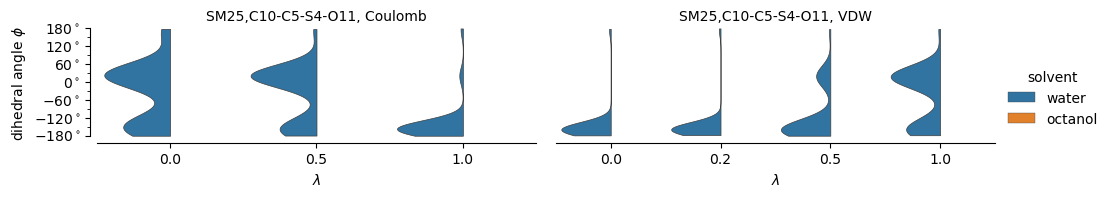

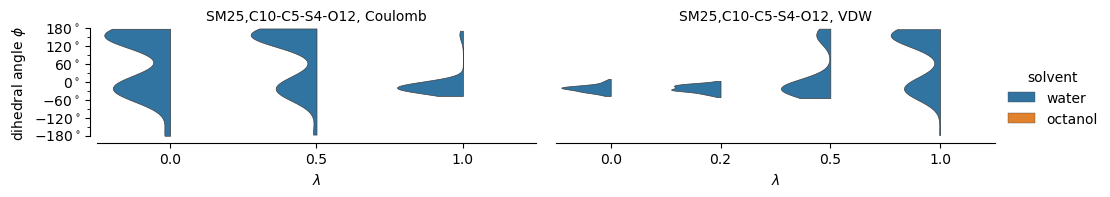

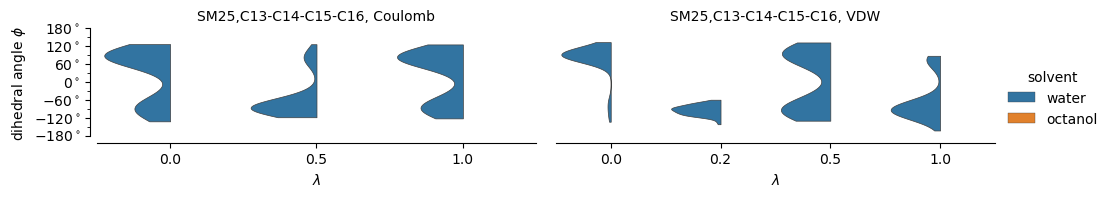

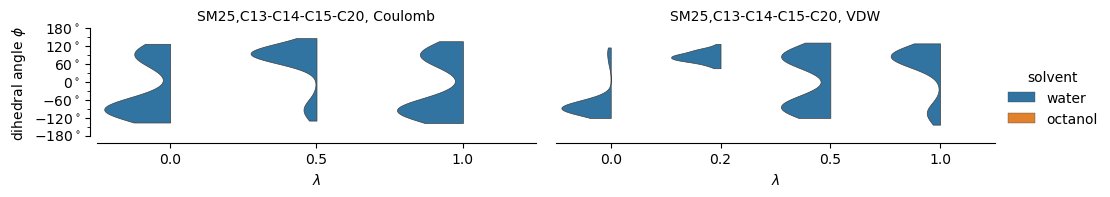

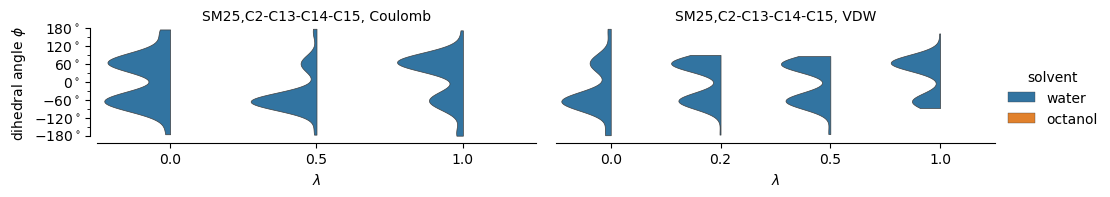

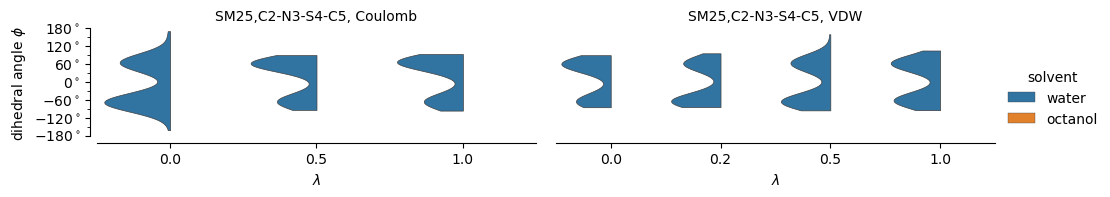

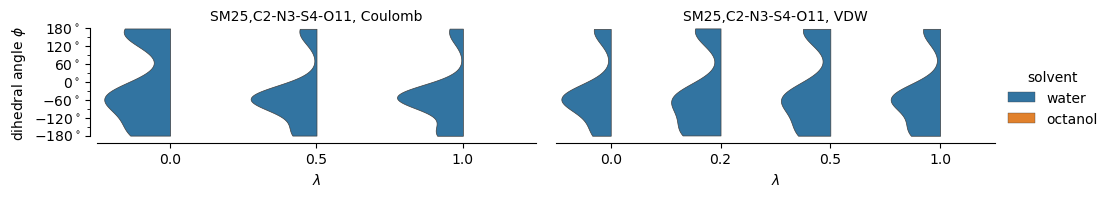

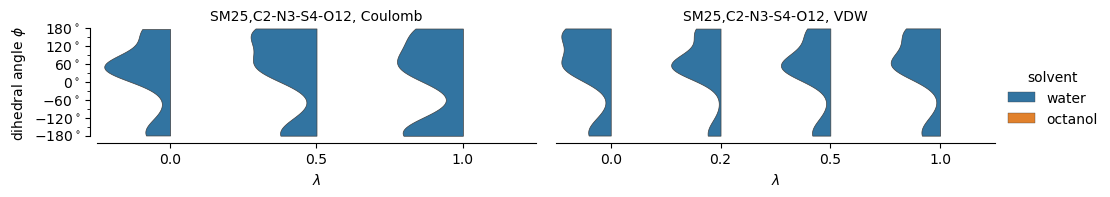

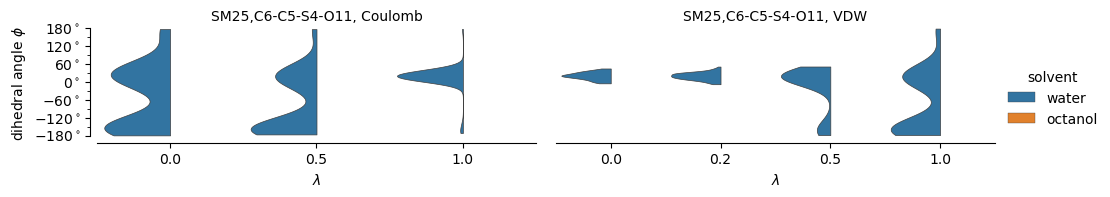

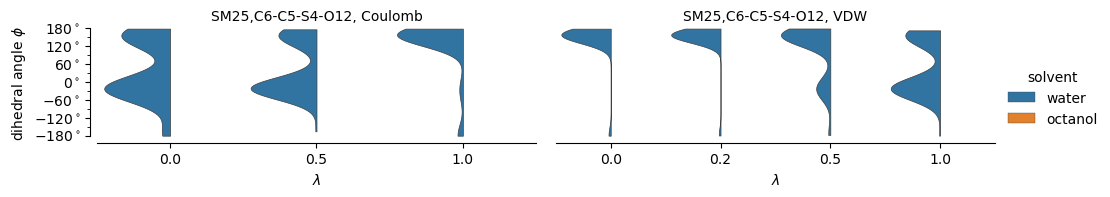

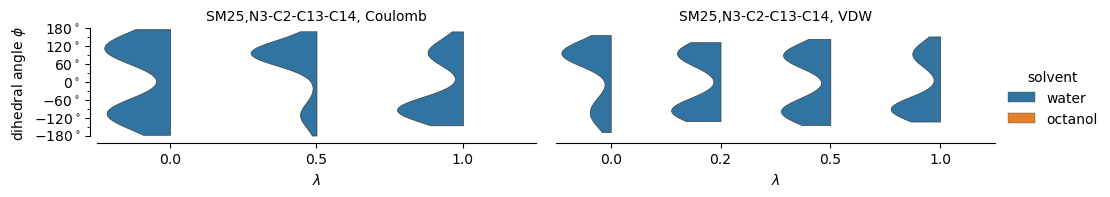

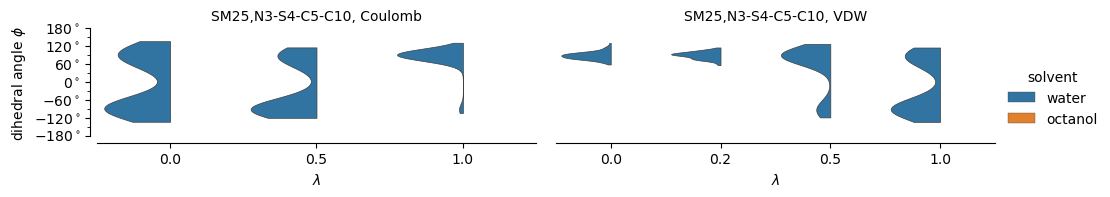

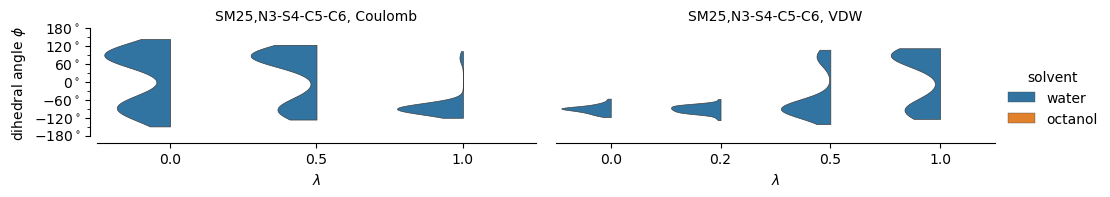

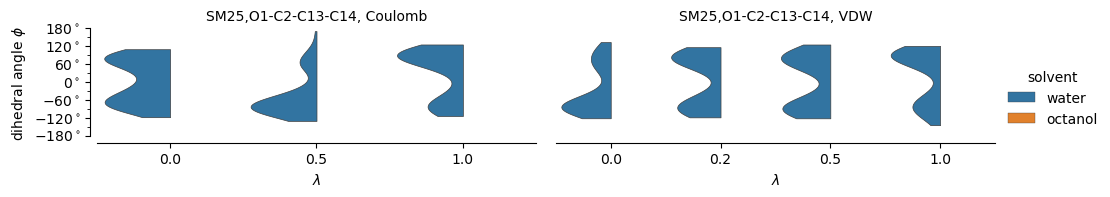

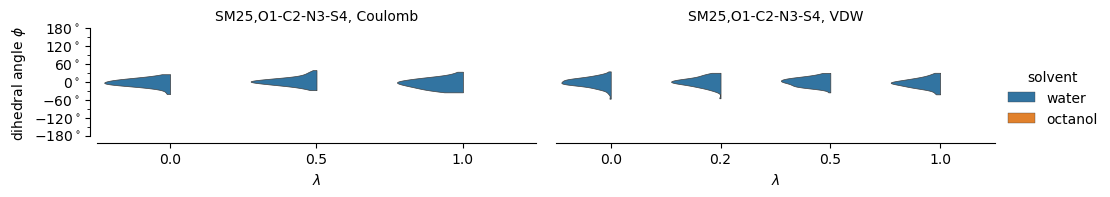

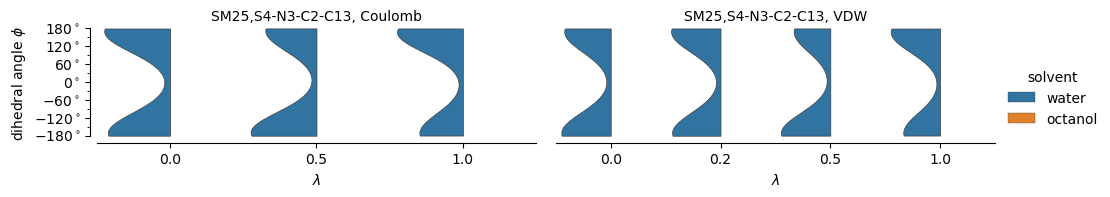

In [44]:
dihedrals.plot_violins(df, resname, figdir=None, molname=molname, width=width, solvents=solvents)

### padded angles

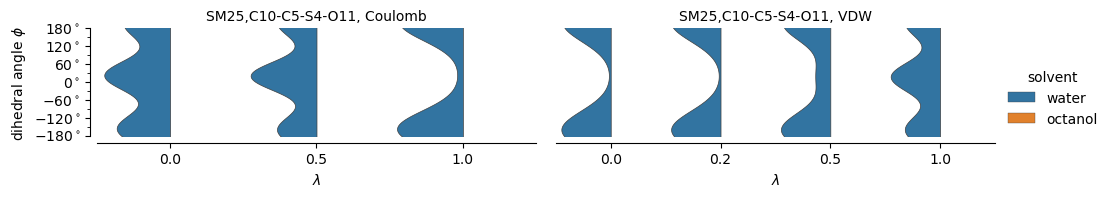

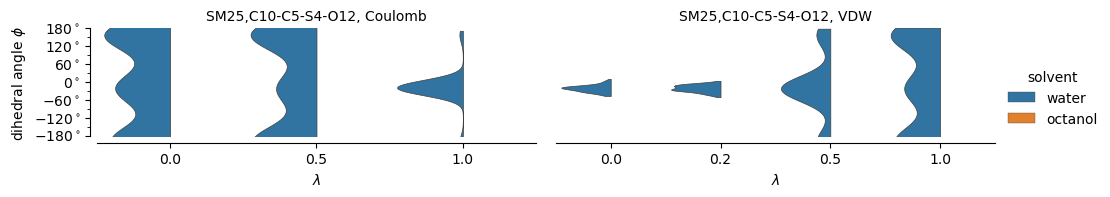

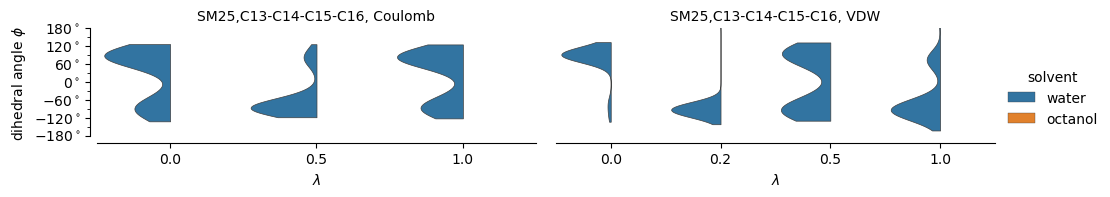

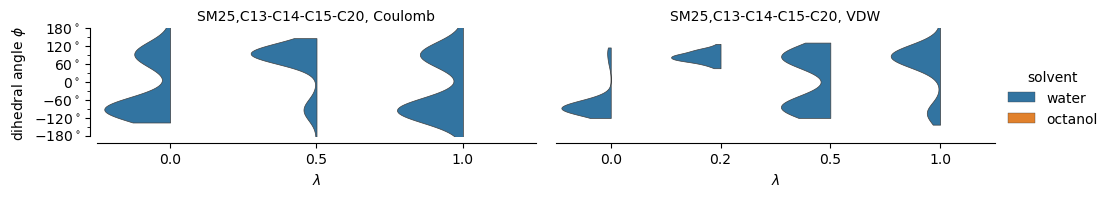

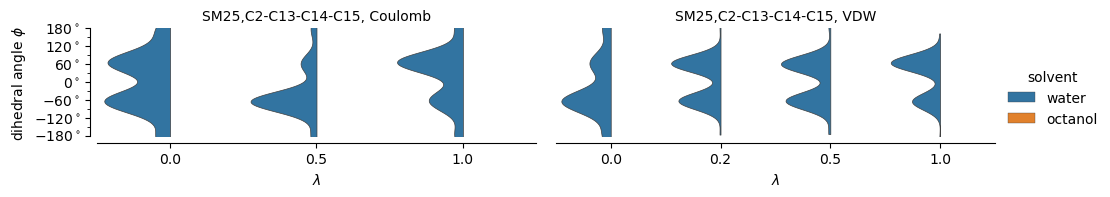

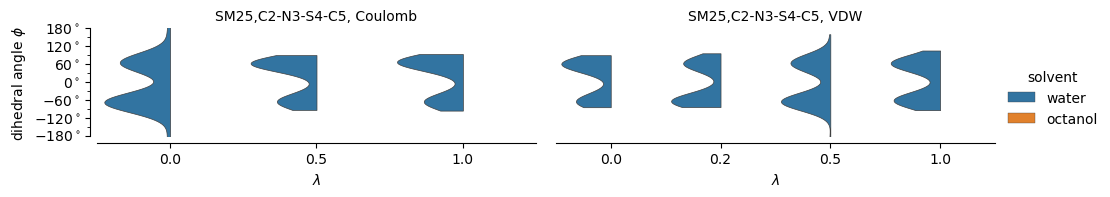

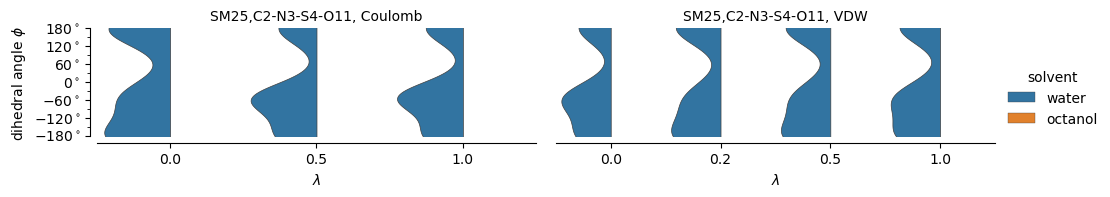

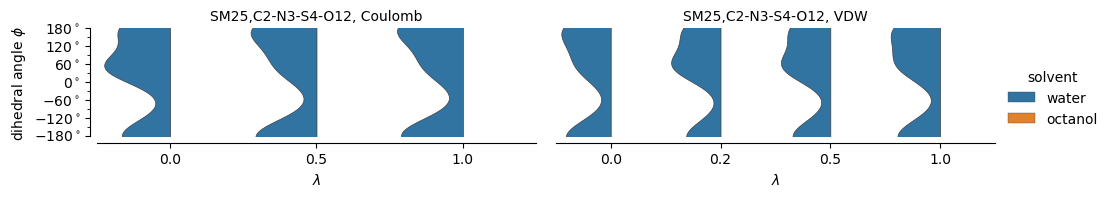

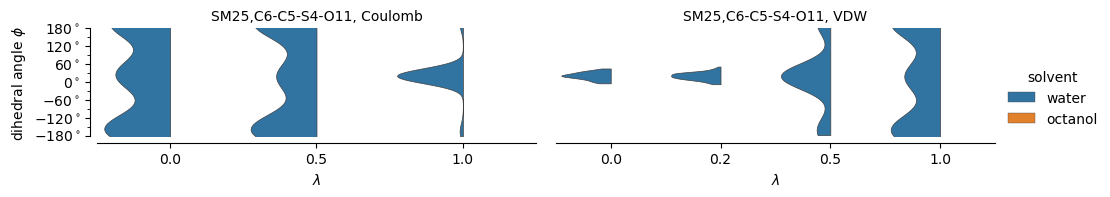

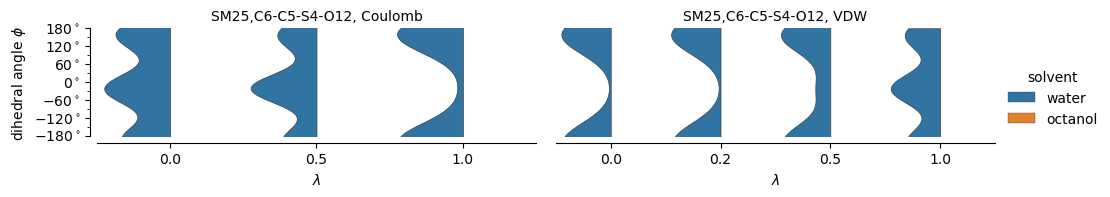

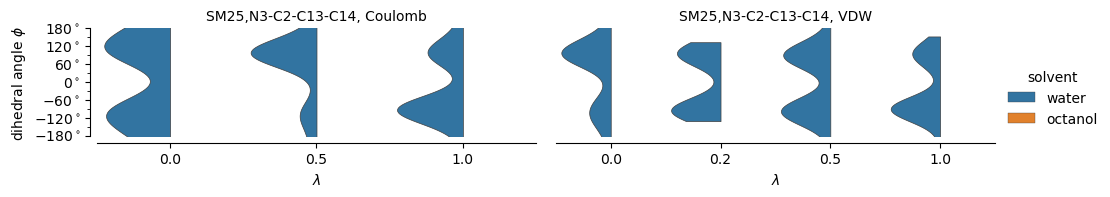

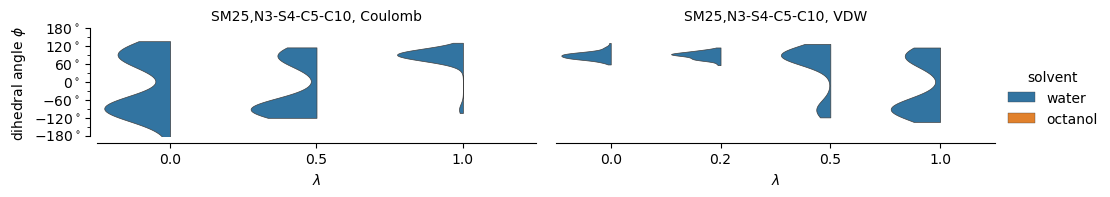

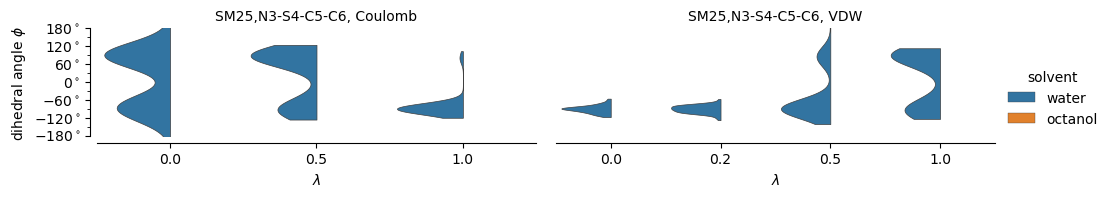

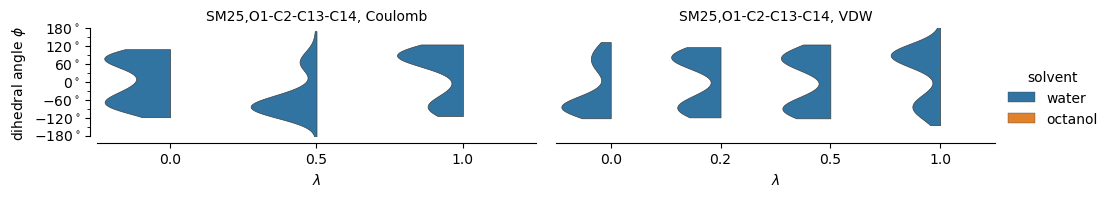

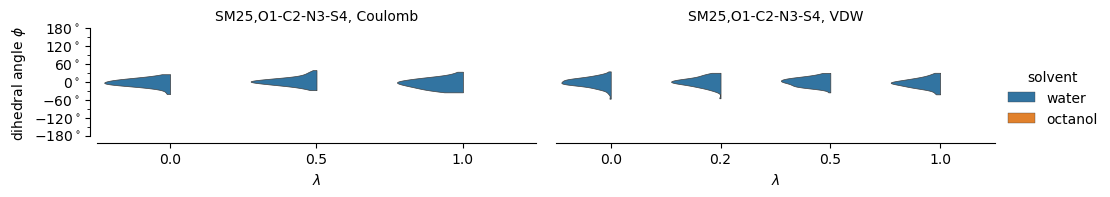

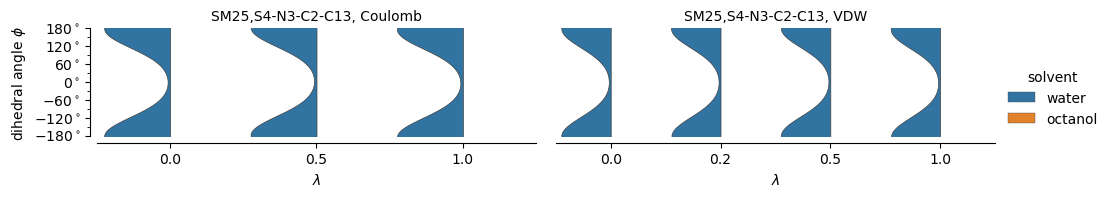

In [45]:
dihedrals.plot_violins(df_aug, resname, figdir=fig_save_directory, molname=molname, width=width, solvents=solvents)

In [46]:
placeholder = path / 'SM25_figs_top_level_run'
placeholder2 = path / 'SM25_top_level_results_no_pad'

In [47]:
os.mkdir(placeholder)
os.mkdir(placeholder2)

# Full, top-level functionality
* ##### encompasses all previously used functions

mdpow._ensemble: INFO     Searching . directory for systems
mdpow._ensemble: INFO     Searching . directory for systems
mdpow._ensemble: INFO     Setting up systems


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'Coulomb', '0000')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'Coulomb', '0500')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'Coulomb', '1000')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'VDW', '0000')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'VDW', '0200')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'VDW', '0500')]

mdpow._ensemble: INFO     Moving to next universe


  0%|          | 0/101 [00:00<?, ?it/s, running system ('water', 'VDW', '1000')]

mdpow._ensemble: INFO     Moving to next universe
mdpow._ensemble: INFO     Finishing up
/nfs/homes3/cade/Projects/Repositories/MDPOW-ADA/mdpow/workflows/dihedrals.py:340: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dihedral -= 360
/nfs/homes3/cade/Projects/Repositories/MDPOW-ADA/mdpow/workflows/dihedrals.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dihedral += 360


/nfs/homes3/cade/Projects/Notebooks/tmp_data/SM25_top_level_results_no_pad/SM25/SM25_full_df.bz2


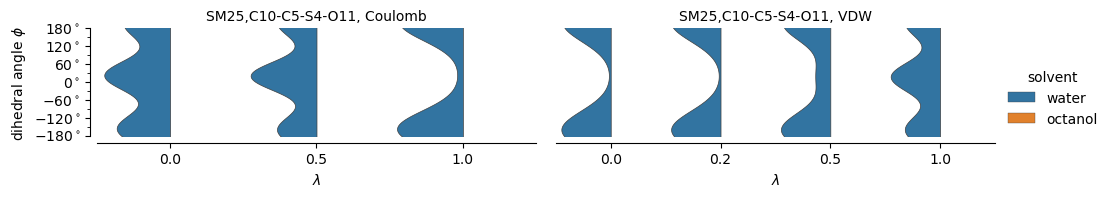

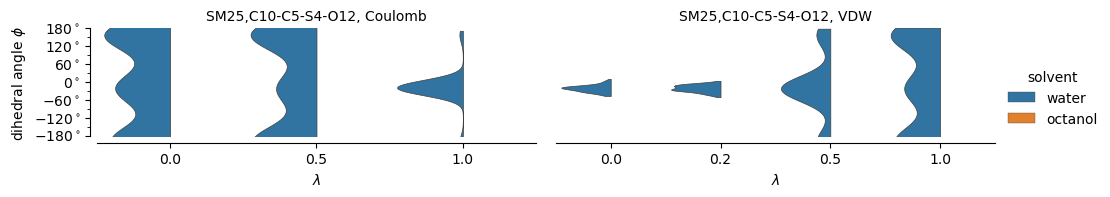

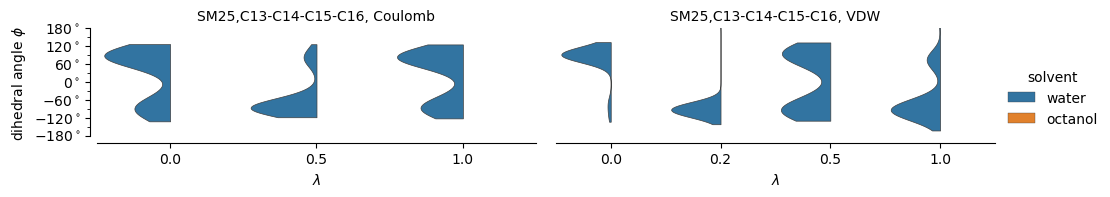

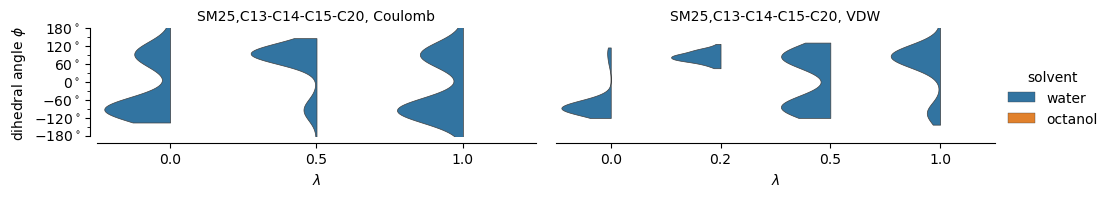

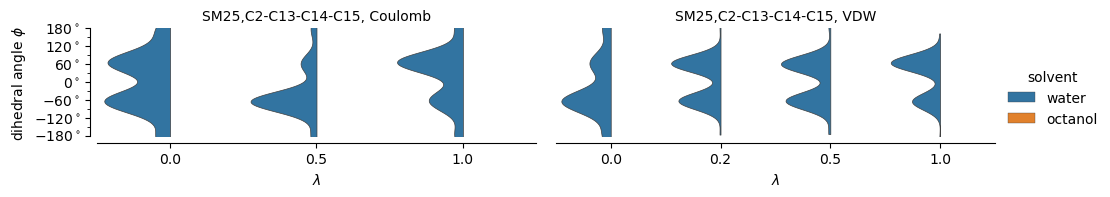

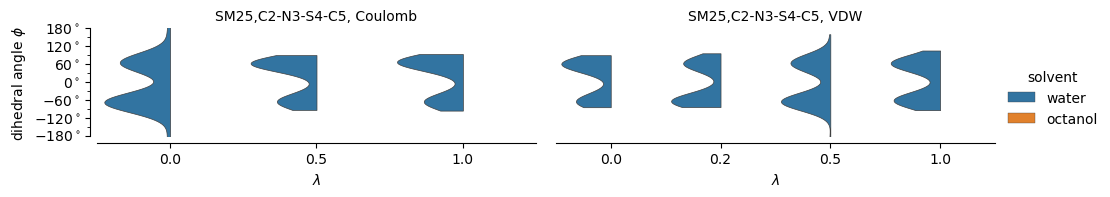

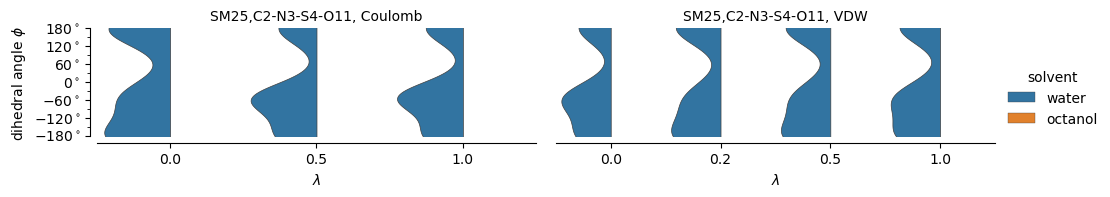

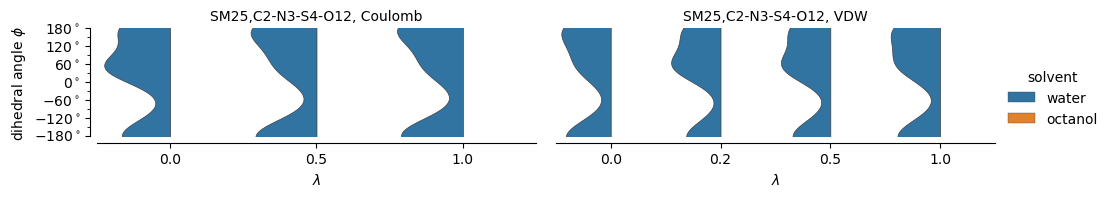

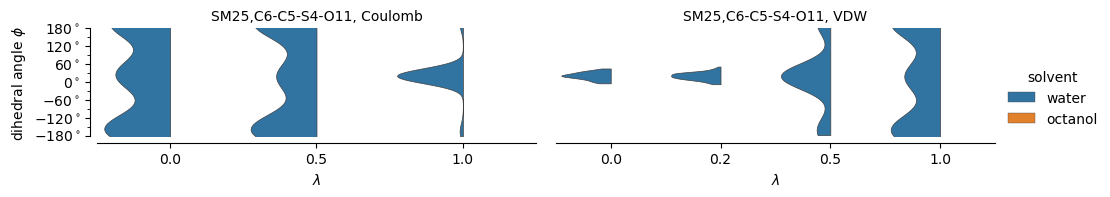

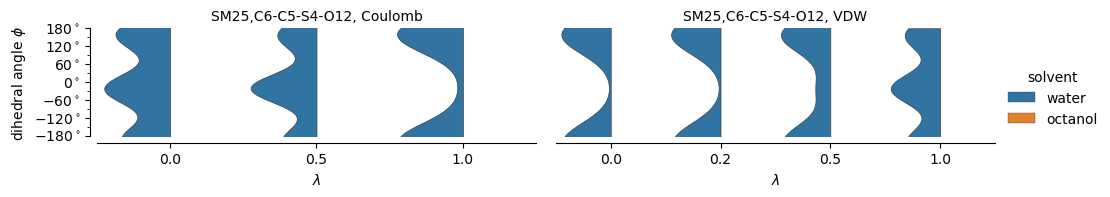

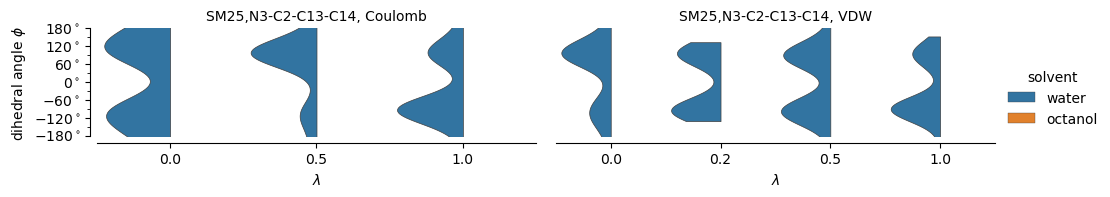

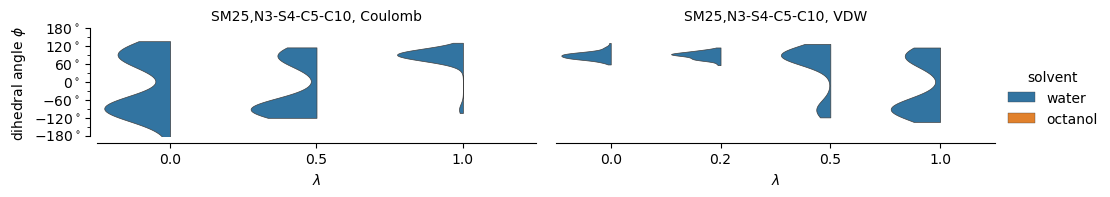

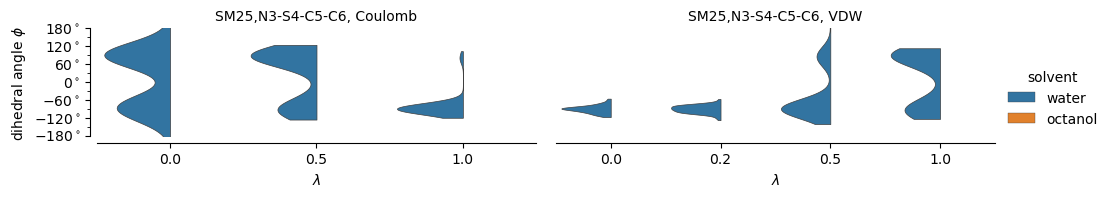

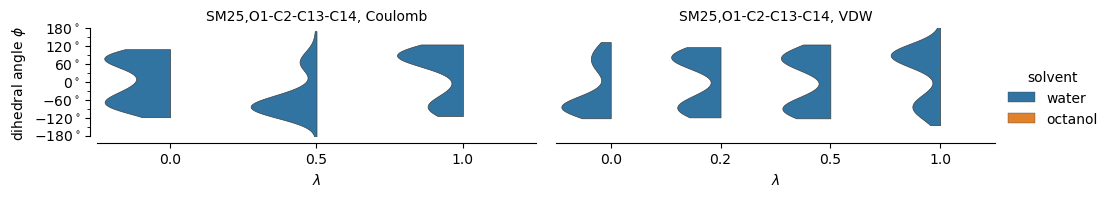

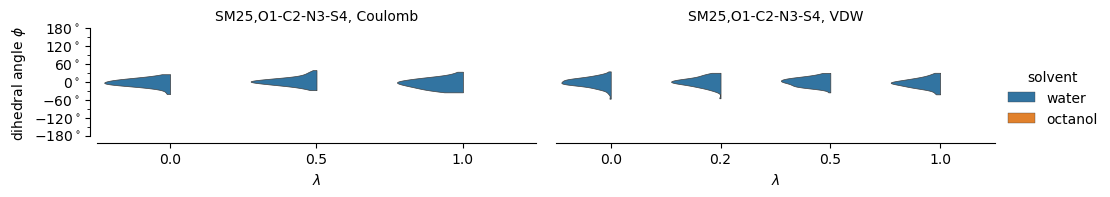

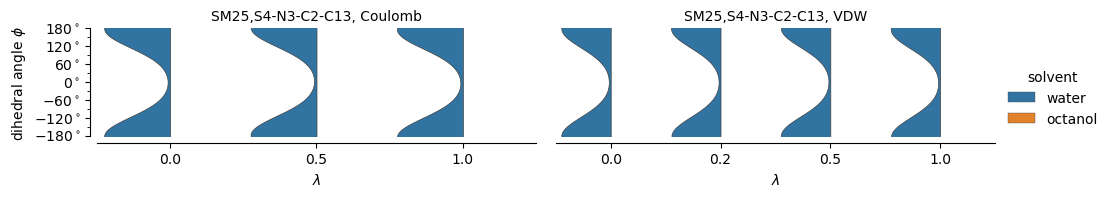

In [48]:
dihedrals.automated_dihedral_analysis(dirname=dirname, df_save_dir=placeholder2, figdir=placeholder,
                                resname=resname, molname=molname, SMARTS=SMARTS_DEFAULT,
                                dataframe=None, padding=padding, width=width,
                                solvents=solvents, interactions=interactions)